<a href="https://colab.research.google.com/github/Sriharshitha842/ML_LAB/blob/main/ML_lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME OF THE STUDENT : SRIHARSHITHA D**

**REGISTRATION NUMBER : 19BCD7246**

**COURSE CODE : CSE3008**

**LAB NUMBER : 12**

## **IMAGE CLASSIFICATION USING ANN**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
print(f"Tensorflow Version: {tf.__version__}")

Tensorflow Version: 2.7.0


In [3]:
# load the datasets from fashion_mnist into training and testing datasets
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape:  {x_test.shape}")
print(f"y_test shape:  {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [5]:
# see the maximum, minimum, and mean values in x_train
print(f"x_train Max Value:  {np.max(x_train)}")
print(f"x_train Min Value:  {np.min(x_train)}")
print(f"x_train Mean Value: {np.mean(x_train):.1f}")

x_train Max Value:  255
x_train Min Value:  0
x_train Mean Value: 72.9


In [6]:
# see the maximum and minimum values in y_train
print(f"y_train Max Value:  {np.max(y_train)}")
print(f"y_train Min Value:  {np.min(y_train)}")

y_train Max Value:  9
y_train Min Value:  0


In [7]:
# define the classes as a list
class_names = ['0 Top/T-Shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat',
               '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']

**Data Exploration**

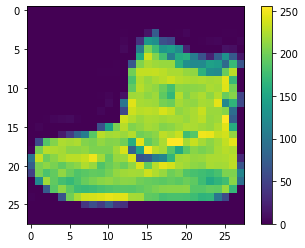

In [8]:
#first image in x_train
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [9]:
# show the label for the first image in x_train
print(f"x_train[0] = {class_names[y_train[0]]}")

x_train[0] = 9 Ankle boot


**Normalize the dataset**

In [10]:
# this helps the neural network learn faster
x_train = x_train / 255.0
x_test = x_test / 255.0

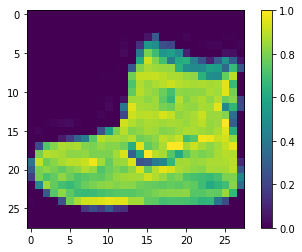

In [11]:
# show the image after it has been normalized
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

**Flatten the model**

In [12]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [13]:
# -1 selects all images in the dataset
# 28*28 converts the 2D 28 x 28 dimension into a 1D dimension

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [14]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

**Build a model**

In [15]:
# define an object
model = tf.keras.models.Sequential()

# adding the first fully connected hidden layer parameters:
# 1) units (number of neurons) = 128
# 2) activation function = ReLU
# 3) input shape = 784 entered as (784,)
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

# adding the second layer with dropout
# dropout: a regularization technique where randomly selected neurons will be ignored during training to prevent overfitting
model.add(tf.keras.layers.Dropout(rate=0.3))

# adding the output layer parameters:
# 1) units (neurons) = 10  
# 2) activation = softmax     
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

**Train the model**

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
# begin training the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5584 - sparse_categorical_accuracy: 0.8034
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4217 - sparse_categorical_accuracy: 0.8489
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3893 - sparse_categorical_accuracy: 0.8586
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3687 - sparse_categorical_accuracy: 0.8649
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3545 - sparse_categorical_accuracy: 0.8684
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3415 - sparse_categorical_accuracy: 0.8737
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3325 - sparse_categorical_accuracy: 0.8771
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3248 - sparse_categorical_accuracy: 0.8789
Epoch 9/10
1875/1875 [==========

**Model Evalution**

In [18]:
# use the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# print the accuracy and loss
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3357 - sparse_categorical_accuracy: 0.8790
Test Accuracy: 0.8790
Test Loss: 0.3357


**Model Prediction**

In [19]:
# predictions
y_Pred=model.predict(x_test) 
y_pred=np.argmax(y_Pred,axis=1)

In [20]:
# print the predicted class and actual class
print(f"y_pred[0] = {class_names[0]}")
print(f"y_test[0] = {class_names[0]}")

y_pred[0] = 0 Top/T-Shirt
y_test[0] = 0 Top/T-Shirt


**Confusion Matrix**

In [21]:
label_names = ['Top/T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

cm = confusion_matrix(y_test, y_pred)

nr_rows = cm.shape[0]
nr_cols = cm.shape[1]

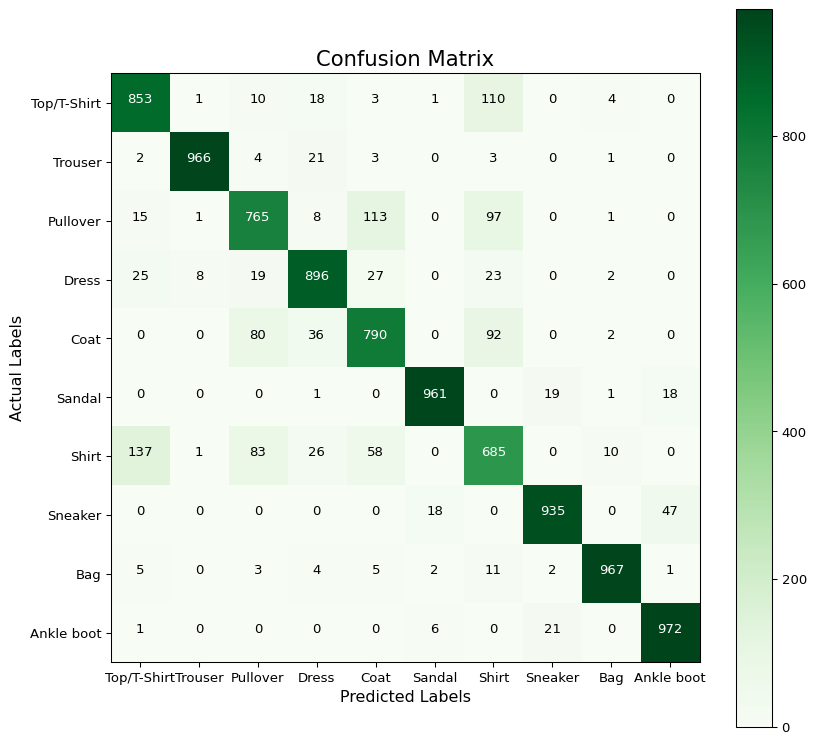

In [22]:
plt.figure(figsize=(10,10), dpi=95)
plt.imshow(cm, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(10)
plt.yticks(tick_marks, label_names)
plt.xticks(tick_marks, label_names)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, cm[i, j], horizontalalignment='center',
            color='white' if cm[i, j] > cm.max()/2 else 'black')
    

plt.show()

In [23]:
# print the accuracy
acc_cm = accuracy_score(y_test, y_pred)
print(f"Accuracy = {acc_cm * 100}%")

Accuracy = 87.9%
